In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
from DB.db_manager import DBManager

In [3]:
train_imgs, train_labels, test_imgs, test_labels = DBManager.load_data("C:/Users/antho/Documents/GitHub/data/handsigns/")

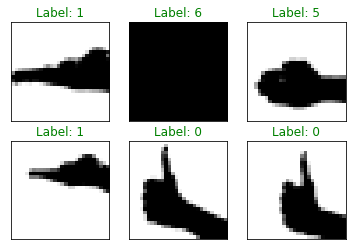

In [4]:
# displaying samples of data
fig = plt.figure()
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(train_imgs[i].reshape([train_imgs.shape[2],
                                      train_imgs.shape[3]]),
               cmap='gray', interpolation='none')
    plt.title("Label: {}".format(train_labels[i]), color='g')  
    plt.xticks([])
    plt.yticks([])

In [5]:
from homemade_framework import framework as NN

In [6]:
# number of epoch
num_epochs = 20
# batch size to compute mini-batch
batch_size = 100
# number of pixels in the image 
input_size = 28*28
# number of possible digit: 0 to 9 
num_class = 7
# small step to find a minima
learning_rate = 0.01
# hidden size
hidden_size = 128
# p dropout
p_dropout = 0
# learning rate decay
LRD = False

## CNN

In [9]:
# Build the model
kernel_size = 3
in_channels = 1
out_channels = 2
data_size = train_imgs.shape[2]
nb_maxpool = 1
out_first_conv = (data_size - kernel_size + 1) // (2*nb_maxpool) - kernel_size + 1

# Build the model
cnn_model = NN.Sequential([NN.Convolution(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size),
                           NN.LeakyReLU(), NN.MaxPooling2D(2),
                           NN.Convolution(in_channels=out_channels, out_channels=out_channels, kernel_size=kernel_size),
                           NN.LeakyReLU(), NN.Flatten(), NN.BatchNorm(),
                           NN.Linear((out_first_conv**2)*out_channels, hidden_size), NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, num_class), NN.Softmax()], NN.LossMSE())
# Set the learning rate
cnn_model.set_Lr(learning_rate)
# Print model's parameters
cnn_model.print(print_color=True)

Model description: Linear in green, Activation in blue, Loss in magenta, Softmax in red, Flatten in Gray, Convolution in Cyan, BatchNormalization in Black, MaxPooling2D in Yellow, AveragePooling2D in highlight
	Convolution feature maps: 2, kernel size: (2, 1, 3, 3)
	LeakyReLU activation, a=0.01
	Max Pooling layer, size: 2
	Convolution feature maps: 2, kernel size: (2, 2, 3, 3)
	LeakyReLU activation, a=0.01
	Flatten function
	Batch normalization function: a=1, b=0
	Linear layer shape: [242, 128]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [128, 7]
	Softmax function
	MSE


In [10]:
NN.train(cnn_model, num_epochs, train_imgs, train_labels, test_imgs, test_labels, batch_size)

Before training: Epoch: 0, Train Error: 90.9702%,        Test Error: 89.5753%, Loss  0.0000
Epoch: 1, Train Error: 39.5773%,        Test Error: 45.9459%, Loss  125.2717
Epoch: 2, Train Error: 24.7839%,        Test Error: 35.1351%, Loss  69.0509
Epoch: 3, Train Error: 24.5917%,        Test Error: 40.1544%, Loss  56.3211
Epoch: 4, Train Error: 17.0029%,        Test Error: 32.8185%, Loss  48.3549
Epoch: 5, Train Error: 13.2565%,        Test Error: 29.3436%, Loss  36.9961
Epoch: 6, Train Error: 10.2786%,        Test Error: 25.0965%, Loss  28.8879
Epoch: 7, Train Error: 8.5495%,        Test Error: 25.8687%, Loss  24.0490
Epoch: 8, Train Error: 7.6849%,        Test Error: 25.0965%, Loss  20.9459
Epoch: 9, Train Error: 6.8204%,        Test Error: 22.0077%, Loss  17.7803
Epoch: 10, Train Error: 5.6676%,        Test Error: 21.6216%, Loss  15.6973
Epoch: 11, Train Error: 5.2834%,        Test Error: 21.2355%, Loss  13.9164
Epoch: 12, Train Error: 4.6110%,        Test Error: 21.2355%, Loss  12.565

In [11]:
cnn_model.getParametersCount()

32069

In [12]:
cnn_model.save("data/model/cnn/")

## Confusion matrix

In [45]:
cnn_model.load("data/model/cnn/")

In [48]:
test_pred = NN.get_inferences(cnn_model, test_imgs)
NN.get_confusion_matrix(test_pred, test_labels, num_class)

array([[34,  1,  2,  0,  6,  0,  0],
       [ 0, 33,  1,  5,  5,  0,  0],
       [ 1,  0, 22,  3,  0,  0,  0],
       [ 0,  0,  7, 39,  0,  1,  0],
       [ 1,  0,  4,  3, 25,  2,  0],
       [ 0,  1,  1,  1,  4, 33,  0],
       [ 0,  1,  0,  0,  0,  0, 23]])

# FCN

In [7]:
train_imgs_flatten = train_imgs.reshape([train_imgs.shape[0], np.prod(train_imgs.shape[1:])])
test_imgs_flatten = test_imgs.reshape([test_imgs.shape[0], np.prod(test_imgs.shape[1:])])

In [8]:
# Build the model
fcn_model = NN.Sequential([NN.Linear(input_size, hidden_size),
                           NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, hidden_size),
                           NN.LeakyReLU(), NN.BatchNorm(),
                           NN.Linear(hidden_size, num_class),
                           NN.Softmax()], NN.LossMSE())
# Set the learning rate
fcn_model.set_Lr(learning_rate)
# Print model's parameters
fcn_model.print(print_color=True)

Model description: Linear in green, Activation in blue, Loss in magenta, Softmax in red, Flatten in Gray, Convolution in Cyan, BatchNormalization in Black, MaxPooling2D in Yellow, AveragePooling2D in highlight
	Linear layer shape: [784, 128]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [128, 128]
	LeakyReLU activation, a=0.01
	Batch normalization function: a=1, b=0
	Linear layer shape: [128, 7]
	Softmax function
	MSE


In [39]:
NN.train(fcn_model, num_epochs, train_imgs_flatten, train_labels,
         test_imgs_flatten, test_labels, batch_size)

Before training: Epoch: 0, Train Error: 80.5956%,        Test Error: 78.3784%, Loss  0.0000
Epoch: 1, Train Error: 37.0797%,        Test Error: 44.4015%, Loss  118.9427
Epoch: 2, Train Error: 23.2469%,        Test Error: 29.3436%, Loss  66.8622
Epoch: 3, Train Error: 14.0250%,        Test Error: 20.8494%, Loss  40.3988
Epoch: 4, Train Error: 8.6455%,        Test Error: 14.6718%, Loss  28.1964
Epoch: 5, Train Error: 8.7416%,        Test Error: 16.6023%, Loss  19.4785
Epoch: 6, Train Error: 5.4755%,        Test Error: 12.7413%, Loss  15.7811
Epoch: 7, Train Error: 4.5149%,        Test Error: 12.3552%, Loss  12.1432
Epoch: 8, Train Error: 3.2661%,        Test Error: 13.1274%, Loss  9.4418
Epoch: 9, Train Error: 2.2094%,        Test Error: 12.7413%, Loss  7.7680
Epoch: 10, Train Error: 1.9212%,        Test Error: 12.3552%, Loss  6.4798
Epoch: 11, Train Error: 1.4409%,        Test Error: 10.8108%, Loss  4.8322
Epoch: 12, Train Error: 0.7685%,        Test Error: 10.8108%, Loss  3.7608
Epoch:

In [20]:
fcn_model.getParametersCount()

117899

In [21]:
fcn_model.save("data/model/fcn/")

In [9]:
fcn_model.load("data/model/fcn/")

In [13]:
test_pred = NN.get_inferences(fcn_model, test_imgs_flatten[0:2])

[[1.76407026e-01 5.52122971e-04 5.21582860e-03 9.86836436e-04
  7.02282158e-01 3.58021370e-03 1.10975815e-01]
 [9.86728403e-04 7.51943892e-01 6.36088539e-02 1.06214304e-01
  5.68628947e-04 7.42464555e-02 2.43113730e-03]]


In [15]:
test_imgs_flatten.shape

(390, 784)

In [17]:
NN.get_confusion_matrix(test_pred, test_labels, num_class)

array([[61,  2,  0,  0,  0,  0,  0],
       [ 0, 55,  1,  1,  2,  0,  0],
       [ 0,  1, 40,  5,  1,  0,  0],
       [ 1,  0,  4, 67,  0,  0,  0],
       [ 0,  1,  3,  1, 60,  2,  0],
       [ 0,  0,  0,  0,  1, 51,  0],
       [ 1,  0,  0,  0,  0,  0, 29]])